# Fast Fourier Transform (FFT)

Vamos a ilustrar la funcionalidad del algoritmo FFT 

In [1]:
# Hacemos que las figuras aparezcan como resultado de los comandos
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

La transformada discreta de Fourier (DFT) es una técnica matemática que convierte del dominio temporal o espacial al dominio de la frecuencia.
Una nota musical 'do' en un piano tiene una frecuencia aproximada de 261.6Hz u oscilaciones por segundo. Esta frecuencia corresponde con las veces por segundo que la membrana se mueve. El movimiento de la membrana crea a su vez pulsos de presión en el aire, que, al llegar al oído inducen una frecuencia similar.
Nota: [El oído humano realiza FFT en la cóclea](https://understandingecstasy.wordpress.com/2010/12/26/hearing-with-the-fourier-transform/).

A modo de ejemplo, hagamos la FFT de una función periódica (una sinusoide):

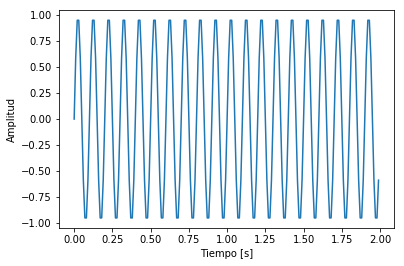

In [2]:
f = 10  # Frequencia en ciclos por segundo (Hz)
f_s = 100  # Frecuencia de muestreo, o número de muestras tomadas por segundo

t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x = np.sin(f * 2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud');

Esta señal se repite cada 1/10 segundos (periodo), es decir tiene una frecuencia de 10Hz.
La DFT nos sirve para estudiar esta señal:

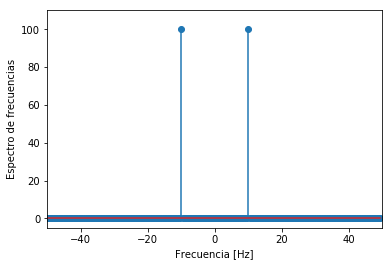

In [3]:
from scipy import fftpack

X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s 
#print(freqs)

fig, ax = plt.subplots()
ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frecuencia [Hz]')
ax.set_ylabel('Espectro de frecuencias')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 110);

El resultado de la FFT, X, es un array de valores complejos del tamaño del array de entrada. Todos los valores son '0' excepto en dos valores. Al representar el resultado en una gráfica, observamos que la magnitud alcanzada en esos valores.
(Nota: FFT es una técnica que permite calcular DFT más rápido, usando resultados itermedios para su cómputo).

Podemos usar un *slider* para variar algún parámetro de la figura anterior. Para ello,  hay que importar ``ipywidgets`` y ``LineCollections``.

<IPython.core.display.Javascript object>


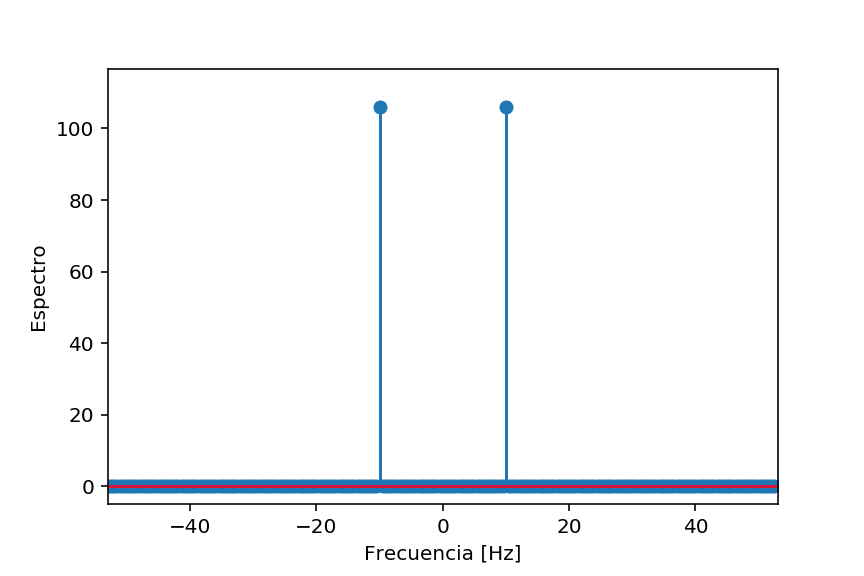

In [5]:
# to allow interaction
%matplotlib notebook 
from ipywidgets import *
from matplotlib.collections import LineCollection

def func(f_s):
    t = np.linspace(0, 2, 2 * f_s, endpoint=False)
    x = np.sin(f * 2 * np.pi * t)
    X = fftpack.fft(x)
    freqs = fftpack.fftfreq(len(x)) * f_s 
    return freqs, np.abs(X)

f = 10
f_s = 100  

fig, ax = plt.subplots()
x,y = func(f_s)
markers, = ax.plot(x,y, ls="none", marker="o")
baseline = ax.axhline(0, color="crimson")

verts=np.c_[x, np.zeros_like(x), x, y].reshape(len(x),2,2)
col = LineCollection(verts)
ax.add_collection(col)

ax.set_xlabel('Frecuencia [Hz]')
ax.set_ylabel('Espectro')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(None, 110);

def update(f_s=100):
    if f_s > 0:
        x, y = func(f_s)
        markers.set_data(x, y)
        verts=np.c_[x, np.zeros_like(x), x, y].reshape(len(x),2,2)
        col.set_segments(verts)
        ax.set_xlim(-f_s / 2, f_s / 2)
        ax.set_ylim(None, 1.1*y.max())
        fig.canvas.draw_idle()

interact(update);

### Obtener la frecuencia dominante 

Para obtener el valor de la frecuencia dominante podemos hacer el análisis congiendo sólo los valores positivos de la FFT:

In [21]:
f = 10;f_s = 100 
t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x = np.sin(f * 2 * np.pi * t)
#print(x)
X = fftpack.fft(x)
#print(X)
freqs = fftpack.fftfreq(len(x), d=1/f_s)
N=len(x)//2
fft = X[:N]
amp = np.abs(fft)

Asumimos que el valor máximo de espectro está por encima de 50. Este umbral puede variar en función de la señal y de la frecuencia de muestreo.

In [22]:
threshold = 50
amp = [k if k>=threshold else 0 for k in amp]

Cogemos el valor del índice de la máxima amplitud:

In [23]:
ind=np.argmax(amp)
ind

20

In [9]:
k=freqs[ind];
print('La frecuencia dominante es: %.2f Hz'% k)

La frecuencia dominante es: 10.00 Hz


## Ejemplo: Espectrograma de un sonido

Podemos cargar en este notebook el canto de un pájaro para analizarlo con Fourier

In [24]:
from IPython.display import Audio
Audio('data/nightingale.wav')

Ahora podemos cargar el audio y tener al mismo tiempo la frecuencia de muestrreo 'rate' y, también, los datos del audio, en un array dimensión Nx2. Dos columnas porque es una grabación estereo.

In [25]:
from scipy.io import wavfile

rate, audio = wavfile.read('data/nightingale.wav')

Convertimos de estereo a mono haciendo una media de los dos canales (izquierdo y derecho).

In [26]:
audio = np.mean(audio, axis=1)

In [28]:
N = audio.shape[0]
L = N / rate

338081

In [30]:
?audio.shape

Número de muestras: {N:338081}; Frecuencia de Muestreo: {Fs:44100}
Tiempo del audio: {L:7.67} segundos


<IPython.core.display.Javascript object>


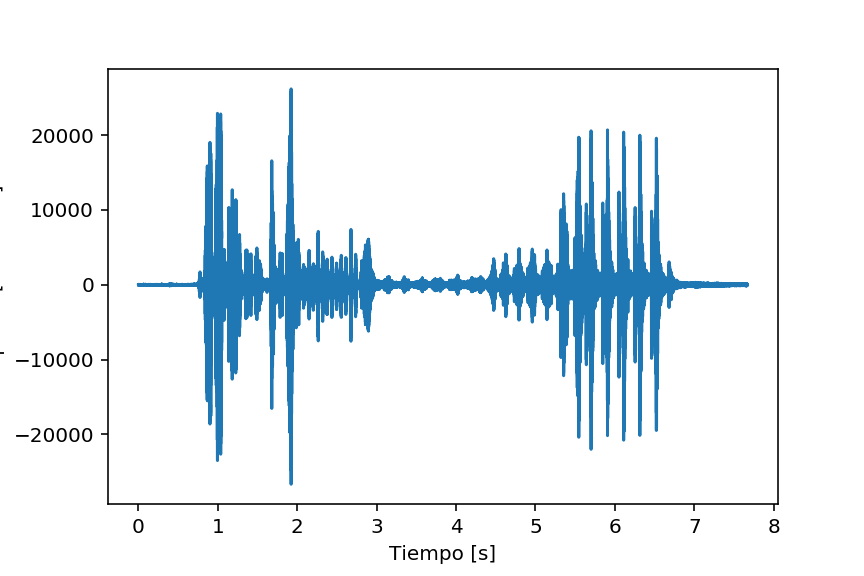

In [35]:
N = audio.shape[0]
L = N / rate
print('Número de muestras: {N:%.2d}; Frecuencia de Muestreo: {Fs:%.2d}'% (N,rate))
print('Tiempo del audio: {L:%.2f} segundos'% L)

f, ax = plt.subplots()
ax.plot(np.arange(N) / rate, audio)
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud [unknown]');

Si pasamos esta señal por un FFT obtenemos las frecuencias (espectro) que componen el sonido en la grabación pero no sabemos el instante en que se produce un sonido en particular.
Para averiguarlo podemos usar la siguiente estrategia:
1. Coger la señal de audio
2. Dividir la grabación cogiendo *ventanas deslizantes*, conjuntos de datos que estén solapados, y
3. Aplicar la FFT a cada una de ellas.

Esta técnica se denomina *Short Time Fourier Transform*

Por ejemplo, podemos user ventanas de 1024 muestras con un deslizamiento de 100 muestras entre una ventana y la anterior.

In [31]:
# Si el siguiente módulo no está instalado, hágalo mediante:
# pip install scikit-image
from skimage import util

M = 1024

slices = util.view_as_windows(audio, window_shape=(M,), step=100)
print('Audio shape: {%.2f}, Sliced audio shape: {%.2f,%.2f}'% (audio.shape[0],slices.shape[0],slices.shape[1]))

Audio shape: {338081.00}, Sliced audio shape: {3371.00,1024.00}


In [32]:
win = np.hanning(M + 1)[:-1]
print(win)
slices = slices * win

[0.00000000e+00 9.41235870e-06 3.76490804e-05 ... 8.47091021e-05
 3.76490804e-05 9.41235870e-06]


In [38]:
slices

array([[-0.00000000e+00, -1.17654484e-04, -6.40034367e-04, ...,
         1.22828198e-03,  6.77683448e-04,  1.64716277e-04],
       [ 0.00000000e+00, -1.41185380e-05, -3.20017184e-04, ...,
         1.69418204e-03,  7.52981609e-04,  1.78834815e-04],
       [-0.00000000e+00, -4.18849962e-04, -1.67538408e-03, ...,
        -1.27063653e-04, -2.82368103e-04, -1.64716277e-04],
       ...,
       [-0.00000000e+00, -1.69422457e-04, -4.89438046e-04, ...,
        -4.57429151e-03, -3.20017184e-03, -9.45942049e-04],
       [-0.00000000e+00, -2.11778071e-04, -2.18364666e-03, ...,
        -6.39553721e-03, -2.61661109e-03, -5.12973549e-04],
       [-0.00000000e+00, -6.30628033e-04, -1.75068224e-03, ...,
         5.08254613e-04,  1.65655954e-03,  6.54158930e-04]])

In [33]:
len(slices)

3371

In [39]:
len(slices[0])

1024

Es mejor tener un *slice* por columna y es mejor transponer,

In [34]:
slices = slices.T
print('Shape of `slices`:', slices.shape)

Shape of `slices`: (1024, 3371)


Por cada *slice* calculamos la DFT que, al ser valores reales, devolverá frecuencias positivas y negativas. Vamos a trabajar cogiendo sólo las frecuencias positivas.

In [35]:
spectrum = fftpack.fft(slices, axis=0)[:M // 2 + 1:-1]
# numpy también tiene una función fft. Podríamos usarla en lugar de la de scipy.
#np.fft.fft(slices, axis=0)[:M // 2 + 1:-1]
spectrum = np.abs(spectrum)

En el espectro tenemos frecuencias muy dispares (algunas bajas y otras muy altas). Si tomamos el logaritmo concentramos las frecuencias en un rango menor. 
Vamos a representar el logaritmo de la señal dividido por la señal máxima (dB's).

<IPython.core.display.Javascript object>


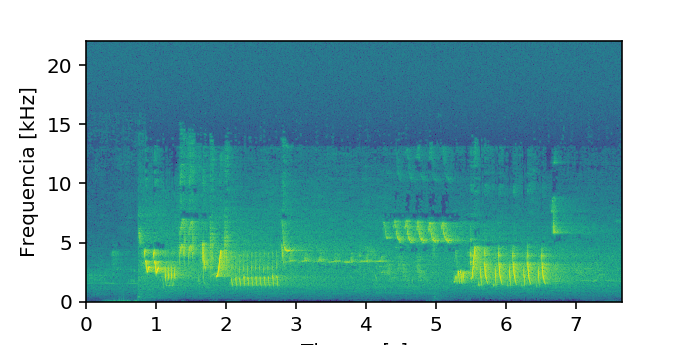

In [37]:
f, ax = plt.subplots(figsize=(4.8, 2.4))
S = np.abs(spectrum)
S = 20 * np.log10(S / np.max(S))
ax.imshow(S, origin='lower', cmap='viridis',
              extent=(0, L, 0, rate / 2 / 1000))
ax.axis('tight')
ax.set_ylabel('Frequencia [kHz]')
ax.set_xlabel('Tiempo [s]');

Scipy también tiene una función para hacer espectrogramas:

<IPython.core.display.Javascript object>


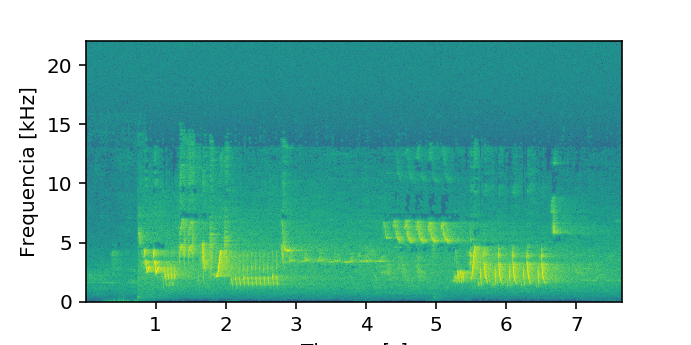

In [43]:
from scipy import signal
freqs, times, Sx = signal.spectrogram(audio, fs=rate, window='hanning',
                                          nperseg=1024, noverlap=M - 100,
                                          detrend=False, scaling='spectrum')
f, ax = plt.subplots(figsize=(4.8, 2.4))
ax.pcolormesh(times, freqs / 1000, 10 * np.log10(Sx), cmap='viridis')
ax.set_ylabel('Frequencia [kHz]')
ax.set_xlabel('Tiempo [s]');

## Elección de la longitud de la DFT

Siempre seleccionar un número de muestras $2^m$ para hacer la FFT. Los algoritmos de FFT optimizan tiempo usando potencias de dos.

# Referencias:

[Elegant Scipy](https://www.oreilly.com/library/view/elegant-scipy/9781491922927/), Harriet Dashnow, Stéfan van der Walt, Juan Nunez-Iglesias.

[Practical Cryptography](http://practicalcryptography.com/miscellaneous/machine-learning/intuitive-guide-discrete-fourier-transform/): Tutorial introduction to DFT.

[Understanding the FFT Algorithm](http://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/). Pythonic Perambultions Blog.